In [36]:
import os
import pandas as pd
import numpy as np
import sys
from time import time

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import TimeDistributed
from keras.callbacks import TensorBoard
from keras.optimizers import RMSprop
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from keras.utils import np_utils

from keras import backend as K
K.set_image_dim_ordering('tf')
import matplotlib.pyplot as plt
import itertools
from keras.regularizers import L1L2

import numpy as np
import pandas as pd
np.random.seed(10)

from time import time
import numpy as np
import keras.backend as K
from keras.engine.topology import Layer, InputSpec
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import Adagrad
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import accuracy_score
from sklearn import manifold
import keras.layers.normalization as bn

from sklearn.metrics import confusion_matrix
from confusion_matrix_pretty_print import _test_data_class
from sklearn.utils import shuffle
import os        
from keras.utils import plot_model
from keras.utils import to_categorical
import keras

from sklearn.preprocessing import normalize  
from sklearn.preprocessing import normalize  
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from keras import regularizers

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Convolution2D, MaxPooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Dense
from keras.layers import Flatten, Dense, Reshape
from keras.layers import LSTM
from keras.layers.embeddings import Embedding

from keras.layers import Input, Dense, LSTM, MaxPooling1D, Conv1D, RepeatVector
from keras.models import Model
from data_util import *
from autoencoder import *

import pandas
import seaborn as sns

%matplotlib inline

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0" #model will be trained on GPU 0

In [37]:
df = pd.read_csv("all_gene_input_data.csv", sep='\t')    
df = df.drop(df.columns[[0]], axis=1)
column_headers = df.columns.values.tolist()

#Var_Corr = df.corr()
# plot the heatmap and annotation on it
#sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [24]:
def build_LSTM_Model(num_classes, timesteps, data_dim, reg): #OK
    # expected input data shape: (batch_size, timesteps, data_dim)
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(timesteps, data_dim), recurrent_regularizer= reg)) 
    model.add(Dropout(0.70))

    #model.add(LSTM(64, return_sequences=True))
    #model.add(Dropout(0.50))
    
    # apply softmax to output
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [38]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/admin-karim/AppData/Local/Programs/Python/Python35/Lib/site-packages/graphviz/'
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate

def Conv_LSTM(num_classes, timesteps, reg):
    input_layer = Input(shape=(1, 20308))
    
    conv1 = Conv1D(filters=32, kernel_size=8, strides=2, activation='relu', padding='same')(input_layer)
    bn1 = BatchNormalization()(conv1)
    pool1 = MaxPooling1D(pool_size=2, strides=2, padding='same')(bn1)
    
    conv2 = Conv1D(filters=32, kernel_size=4, strides=2, activation='relu', padding='same')(pool1)
    bn2 = BatchNormalization()(conv2)
    pool2 = MaxPooling1D(pool_size=2, strides=2, padding='same')(bn2)
    
    conv3 = Conv1D(filters=32, kernel_size=4, strides=1, activation='relu', padding='same')(pool2)
    bn3 = BatchNormalization()(conv3)
    
    # Global Layers
    gmaxpl = GlobalMaxPooling1D()(bn3)
    gmeanpl = GlobalAveragePooling1D()(bn3)
    mergedlayer = concatenate([gmaxpl, gmeanpl], axis=1)
    
    #fl = Flatten()(mergedlayer)
    #rv = RepeatVector(20308)(mergedlayer)
    #lstm1 = LSTM(128,return_sequences=True)(bn3)
    #do3 = Dropout(0.5)(lstm1)
    
    #lstm2 = LSTM(64)(do3)
    #do4 = Dropout(0.2)(lstm2)
    
    #flat = Flatten()(mergedlayer)
    output_layer = Dense(num_classes, activation='softmax')(mergedlayer)
    
    model = Model(inputs=input_layer, outputs=output_layer)  
    
    return model

In [39]:
path = "all_gene_input_data.csv"
type_features, type_labels = prepareData(path)

(7895, 20308)
(7895,)
Shauffle completed!


In [40]:
#labels = one_hot_encode(type_labels)
type_labels_one_hot = to_categorical(type_labels)
    
from sklearn.utils import class_weight
train_x, test_x, train_y, test_y = prepare_test_train_valid(type_features, type_labels_one_hot)

sample_weights = class_weight.compute_sample_weight('balanced', train_y)
    
print(train_x.shape)
print(test_x.shape)  

X_train shape: (5921, 20308)
Y_train shape: (5921, 14)
(5921, 1, 20308)
(1974, 1, 20308)


In [41]:
def model_train(model, number_epoch, train_x, train_y):   
    optimizer = keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)

    # a stopping function should the validation loss stop improving
    #earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    #plot_model(model, show_shapes=True, to_file='ConvLSTM.png')   
    tensorboardRNN = TensorBoard(log_dir="RNN_logs/{}".format(time()))
    
    #for i in range(number_epoch):
    history1 = model.fit(train_x, train_y, validation_split=0.1, callbacks=[tensorboardRNN], batch_size=32, class_weight = sample_weights, epochs=int(number_epoch), shuffle=False)
    #model.reset_states()        
    
    print(model.summary())

    return model, history1

In [42]:
def plotLoses(history1, number_opoch): 
    # visualizing losses and accuracy 
    train_loss = history1.history['loss']
    val_loss   = history1.history['val_loss']
    train_acc  = history1.history['acc']
    val_acc    = history1.history['val_acc']
    xc         = range(number_opoch)
   
    plt.plot(xc, train_loss, 'r--', label='Traing loss per epoch', linewidth=1.0)
    plt.title('Training and validation loss per epoch')
    #plt.xlabel('Epoch')
    #plt.ylabel('Traing loss')
    #plt.legend(loc='upper right')
    #plt.grid(True)
    
    plt.plot(xc, val_loss, 'c--', label='Validation loss per epoch', linewidth=1.0)
    #plt.title('Validation loss per epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    #plt.grid(True)
    plt.show()
    
    plt.plot(xc, train_acc, 'r--', label='Training accuracy per epoch', linewidth=1.0)
    plt.title('Training vs validation accuracy per epoch')
    #plt.xlabel('Epoch')
    #plt.ylabel('Traing loss')
    #plt.legend(loc='upper right')
    #plt.grid(True)
    
    plt.plot(xc, val_acc, 'c--', label='Validation accuracy per epoch', linewidth=1.0)
    #plt.title('Validation loss per epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    #plt.grid(True)

In [43]:
def model_evaluate(model, test_x, test_y):            
    y_prob = model.predict(test_x) 
    
    y_pred = y_prob.argmax(axis=-1)
    y_true = np.argmax(test_y, 1)

    score, accuracy = model.evaluate(test_x, test_y, batch_size=32)
    
    print("Accuracy = {:.2f}".format(accuracy))
    print("Score = {:.2f}".format(score))

    p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='weighted')
        
    print ("F-Score:", round(f,3))
    print ("Precision:", round(p,3))
    print ("Recall:", round(r,3))
    print ("F-Score:", round(f,3)) 
        
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)
        
    class_names = ["COAD", "GBM", "KIRC", "LGG", "LUAD", "LUSC", "OV", "UCEC", "BRCA", "HNSC","THCA", "PRAD", "STAD", "BLCA"]
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix: true vs predicted label')  
    plt.show() 
    
    _test_data_class(y_true, y_pred, class_names)
    import gc; gc.collect()
    
    print(classification_report(y_true, y_pred, target_names=class_names))

In [44]:
def cancerTypeClassifier_ConvLSTM(number_epoch, reg):

    timesteps = 128
    num_classes = 14

    model = Conv_LSTM(num_classes, timesteps, reg)
       
    model.summary()

    trainedModel, history1 = model_train(model, number_epoch, train_x, train_y)
    plotLoses(history1, number_epoch)
    model_evaluate(trainedModel, test_x, test_y) 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 1, 20308)     0                                            
__________________________________________________________________________________________________
conv1d_16 (Conv1D)              (None, 1, 32)        5198880     input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 1, 32)        128         conv1d_16[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_11 (MaxPooling1D) (None, 1, 32)        0           batch_normalization_16[0][0]     
__________________________________________________________________________________________________
conv1d_17 

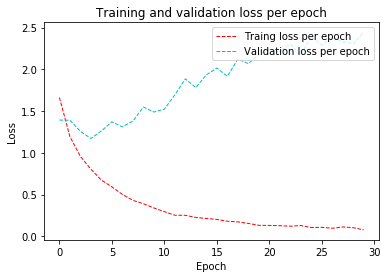

1974/1974 [==============================] - 3s 1ms/step
Accuracy = 0.63
Score = 2.56
F-Score: 0.638
Precision: 0.652
Recall: 0.634
F-Score: 0.638
Confusion matrix, without normalization
[[ 82   0   1   0   2   2   1   2   2   5   5   1  17   2]
 [  1 118   2   7   2   1   1   0   1   1   1   1   1   1]
 [  0   1 109   1   3   0   0   2   1   7   4   4   4   1]
 [  4  22   4  64   2   1   2   2   0   3   8   7   2   3]
 [  2   2   4   3  72   9   3   6   5  10   5   2  11   5]
 [  0   1   1   0  12  82   2   3   2  21   1   2   8   6]
 [  0   2   1   0   0   1 114  12   3   0   0   1   0   0]
 [  2   0   0   1   1   1  13  75   7   5  22   1   4   0]
 [  3   0   3   4  10   6   7  33 182   9   8   2   6  10]
 [  1   1   5   0   4  33   0   1   1  69   1   6   9   3]
 [  2   0   6   1   9   1   0  15   6   7  78  11   4   4]
 [  6   1   2   0   5   2   0   0   3   8  10  83   5   3]
 [  5   0   1   1   1   1   0   9   2   8   8   3  61   4]
 [  3   3   3   0   5   4   1   1   4  18   4 

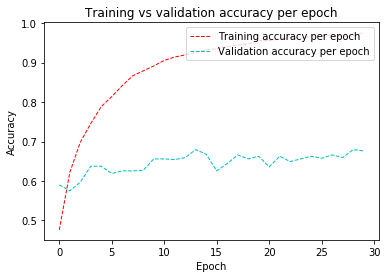

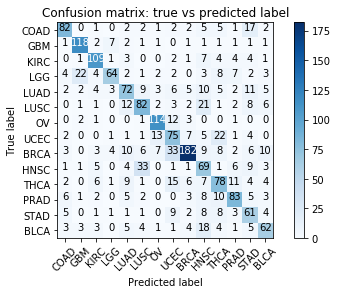

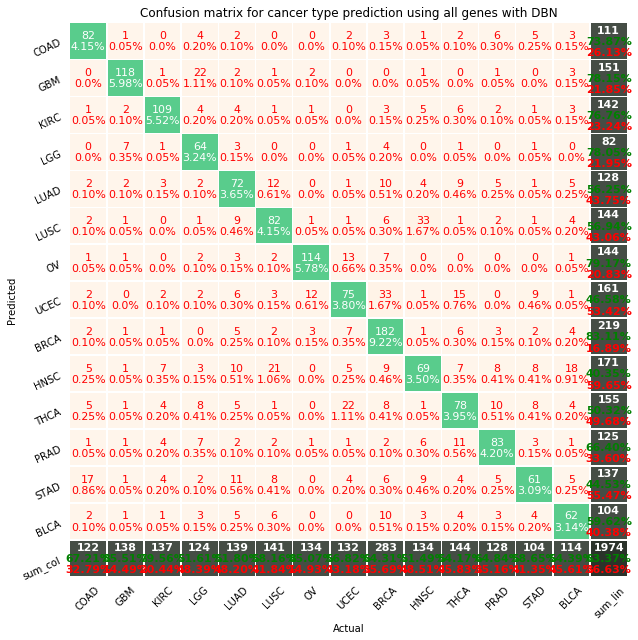

             precision    recall  f1-score   support

       COAD       0.74      0.67      0.70       122
        GBM       0.78      0.86      0.82       138
       KIRC       0.77      0.80      0.78       137
        LGG       0.78      0.52      0.62       124
       LUAD       0.56      0.52      0.54       139
       LUSC       0.57      0.58      0.58       141
         OV       0.79      0.85      0.82       134
       UCEC       0.47      0.57      0.51       132
       BRCA       0.83      0.64      0.73       283
       HNSC       0.40      0.51      0.45       134
       THCA       0.50      0.54      0.52       144
       PRAD       0.66      0.65      0.66       128
       STAD       0.45      0.59      0.51       104
       BLCA       0.60      0.54      0.57       114

avg / total       0.65      0.63      0.64      1974



In [45]:
reg = L1L2(l1=0.1, l2=0.1)
cancerTypeClassifier_ConvLSTM(30, reg)